<a href="https://colab.research.google.com/github/Farahnosh-Yousofi/Naive-Bayes--Perceptron--Linear-models/blob/main/Copy_of_MA421Homework4Problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this homework, 1) you will apply the python implementation of logistic regression you have written in HW 3 to a real-word dataset; 2) you will study the Confusion Matrix metric and implement a modification of the loss to improve performance.
First we import some libraries that we need.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

We consider [the Bank Marketing Data Set](https://archive.ics.uci.edu/ml/datasets/Bank+Marketing#) that is available at UCI's Machine Learning Repository. Colab can read this dataset directly from [GitHub](https://github.com/madmashup/targeted-marketing-predictive-engine) using pandas package: pd.read_csv. The data is in the DataFrame format.

In [2]:
url = 'https://raw.githubusercontent.com/madmashup/targeted-marketing-predictive-engine/master/banking.csv'
data = pd.read_csv(url)
print(data.shape)
print(list(data.columns))

(41188, 21)
['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y']


This dataset is pretty large and cause my machine to crash. I remove some fileds using data.drop. [This Webpage](https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8) has a good description of this dataset. The field "y" is the label denoting whether a custormer subscribes to a term deposit.

Note that you are not allowed to use any existing model such as those used in the above Webpage for this homework.

In [3]:
cat_vars=['default','education','contact','month','day_of_week',]
data=data.drop(cat_vars, axis=1)
print(list(data.columns))
print(data.shape)

['age', 'job', 'marital', 'housing', 'loan', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y']
(41188, 16)


Some data columns have k class enumeration labels. This is best represented by k one-hot encoding, as implemented by panda.get_dummies.

In [4]:
cat_vars=['job','marital','housing','loan','poutcome']
for va in cat_vars:
    #cat_pre='var'+'_'+var
    print(va)
    #print(data[va])
    cat_list = pd.get_dummies(data[va])
    data1=pd.concat([data,cat_list], axis=1)
    data=data1.drop(va, axis=1)
    #print(list(cat_list.columns))
    #print(list(data.columns))
    #print(data.shape)

print(data.shape)
print(list(data.columns))


job
marital
housing
loan
poutcome
(41188, 36)
['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y', 'admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown', 'divorced', 'married', 'single', 'unknown', 'no', 'unknown', 'yes', 'no', 'unknown', 'yes', 'failure', 'nonexistent', 'success']


We now split the data into input data X and the label y. We covert them to numpy and split them into training and testing datasets with 30% for testing.

In [45]:
X = data.loc[:, data.columns != 'y']
y = data.loc[:, data.columns == 'y']
columns = X.columns
X=X.to_numpy()
y=y.to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


X_train=X_train.astype(float)
X_test=X_test.astype(float)

print(X_train.shape)
print(X_test.shape)
print(columns)

(28831, 35)
(12357, 35)
Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'admin.',
       'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired',
       'self-employed', 'services', 'student', 'technician', 'unemployed',
       'unknown', 'divorced', 'married', 'single', 'unknown', 'no', 'unknown',
       'yes', 'no', 'unknown', 'yes', 'failure', 'nonexistent', 'success'],
      dtype='object')


Now, include your code from HW3 and train and test as before. You should get a training accuracy around 90%.

In [46]:
import numpy as np

#def sigmoid(z):
#    return 1 / (1 + np.exp(-z))

def sigmoid(z):
    z = np.clip(z, -500, 500)  # Prevent overflow in exp()
    return 1 / (1 + np.exp(-z))



In [47]:
def loss(y, y_hat):
    eps = 1e-9  # To avoid log(0)
    return -np.mean(y * np.log(y_hat + eps) + (1 - y) * np.log(1 - y_hat + eps))


In [48]:
def model(w, b, X):
    return sigmoid(np.dot(X, w) + b)


In [49]:
def gradients(X, y, y_hat):
    N = X.shape[0]  # Number of samples
    dw = (1 / N) * np.dot(X.T, (y_hat - y))
    db = (1 / N) * np.sum(y_hat - y)
    return dw, db


In [50]:
def train(w, b, X, y, iterations=200, learning_rate=0.1):
    losses = []

    for i in range(iterations):
        y_hat = model(w, b, X)  # Compute predictions
        dw, db = gradients(X, y, y_hat)  # Compute gradients

        w -= learning_rate * dw  # Update weights
        b -= learning_rate * db  # Update bias

        loss_value = loss(y, y_hat)
        losses.append(loss_value)

    return w, b, losses


In [51]:
def predict(y_hat):
    return (y_hat >= 0.5).astype(int)


In [52]:
def accuracy(y, y_hat):
    return np.mean(y == y_hat) * 100


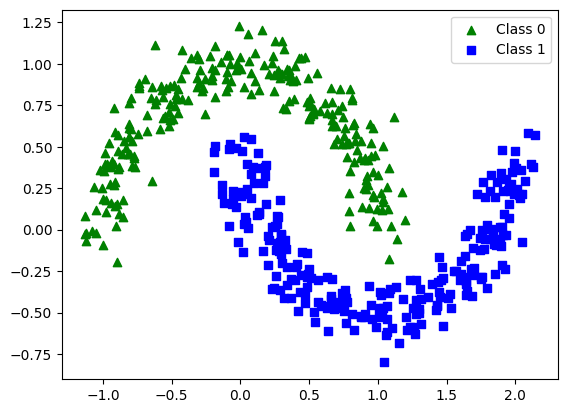

In [53]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

# Generate synthetic dataset
np.random.seed(0)
X_train, y_train = make_moons(n_samples=500, noise=0.1)
X_test, y_test = make_moons(n_samples=1000, noise=0.1)

# Convert y_train and y_test to column vectors
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

# Plot the dataset
plt.figure()
plt.scatter(X_train[:, 0][y_train.flatten() == 0], X_train[:, 1][y_train.flatten() == 0], color="green", marker="^", label="Class 0")
plt.scatter(X_train[:, 0][y_train.flatten() == 1], X_train[:, 1][y_train.flatten() == 1], color="blue", marker="s", label="Class 1")
plt.legend()
plt.show()


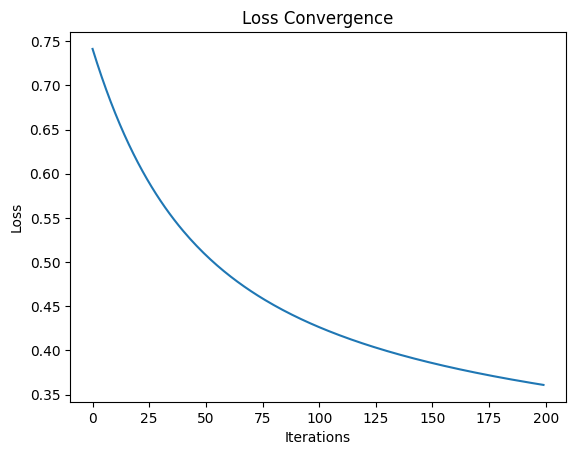

In [14]:
# Initialize parameters
np.random.seed(0)
w = np.random.rand(X_train.shape[1], 1)
b = 0

# Train the model
w, b, losses = train(w, b, X_train, y_train, iterations=200, learning_rate=0.1)

# Plot the loss over iterations
plt.figure()
plt.plot(losses)
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Loss Convergence")
plt.show()


In [15]:
# Compute training accuracy
train_preds = predict(model(w, b, X_train))
train_acc = accuracy(y_train, train_preds)
print(f"Training Accuracy: {train_acc:.2f}%")

# Compute testing accuracy
test_preds = predict(model(w, b, X_test))
test_acc = accuracy(y_test, test_preds)
print(f"Testing Accuracy: {test_acc:.2f}%")


Training Accuracy: 81.40%
Testing Accuracy: 82.30%


In [54]:
X = data.loc[:, data.columns != 'y']
y = data.loc[:, data.columns == 'y']
columns = X.columns
X=X.to_numpy()
y=y.to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

X_train=X_train.astype(float)
X_test=X_test.astype(float)

print(X_train.shape)
print(X_test.shape)
print(columns)

(28831, 35)
(12357, 35)
Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'admin.',
       'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired',
       'self-employed', 'services', 'student', 'technician', 'unemployed',
       'unknown', 'divorced', 'married', 'single', 'unknown', 'no', 'unknown',
       'yes', 'no', 'unknown', 'yes', 'failure', 'nonexistent', 'success'],
      dtype='object')


In [55]:
# Initialize weights and bias
np.random.seed(0)
w = np.random.rand(X_train.shape[1], 1)
b = 0


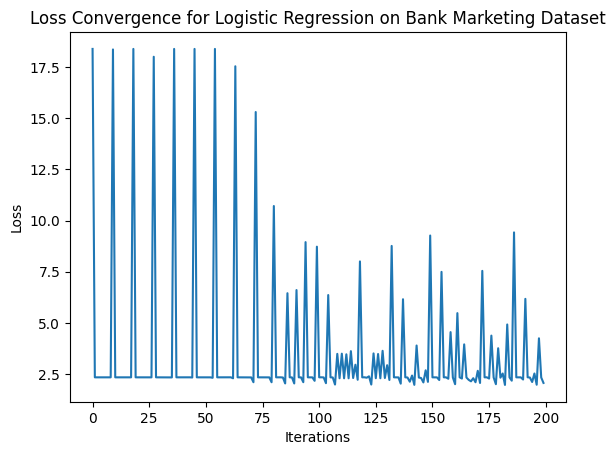

In [56]:
# Train the model
w, b, losses = train(w, b, X_train, y_train, iterations=200, learning_rate=0.1)

# Plot convergence history
plt.figure()
plt.plot(losses)
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Loss Convergence for Logistic Regression on Bank Marketing Dataset")
plt.show()


In [57]:
# Compute predictions on test set
y_pred_test = predict(model(w, b, X_test))

# Compute test accuracy
test_acc = accuracy(y_test, y_pred_test)
print(f"Final Test Accuracy: {test_acc:.2f}%")


Final Test Accuracy: 84.65%


In [58]:
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_test)
print("Confusion Matrix:\n", cm)


Confusion Matrix:
 [[9540 1441]
 [ 456  920]]


For part 2, we compute the confusion matrix for this binary classification as a better metric for accuracy. See [this PAGE](https://machinelearningmastery.com/confusion-matrix-machine-learning/) for a description. To compute the confusion matrix, you may use the confusion_matrix function from the scikit-learn package by involking

from sklearn.metrics import confusion_matrix

Now test your model on the testing dataset by checking the test accuracy and the confusion matrix. Don't forget to discuss the results.

In [59]:
z = model(w,b,X_test)
y_test=np.squeeze(y_test)
acc = accuracy(y_test, predict(z))
print(acc)

print(np.sum(y_test),np.sum(1-y_test))
from sklearn.metrics import confusion_matrix

results = confusion_matrix(y_test, predict(np.squeeze(z)))
print(results)

74.01321567874626
1376 10981
[[9540 1441]
 [ 456  920]]


For part 3, you should modify the loss function and its gradient.

In [60]:
def weighted_loss(y, y_hat, eta):
    eps = 1e-9  # To avoid log(0)
    return -np.mean(eta * y * np.log(y_hat + eps) + (1 - y) * np.log(1 - y_hat + eps))


In [61]:
def weighted_gradients(X, y, y_hat, eta):
    N = X.shape[0]
    sample_weights = np.ones_like(y)
    sample_weights[y == 1] = eta  # Assign higher weight to positive samples

    dw = (1 / N) * np.dot(X.T, sample_weights * (y_hat - y))
    db = (1 / N) * np.sum(sample_weights * (y_hat - y))
    return dw, db


In [62]:
def train_weighted(w, b, X, y, eta=1.0, iterations=200, learning_rate=0.1):
    losses = []

    for i in range(iterations):
        y_hat = model(w, b, X)  # Compute predictions
        dw, db = weighted_gradients(X, y, y_hat, eta)  # Compute weighted gradients

        w -= learning_rate * dw  # Update weights
        b -= learning_rate * db  # Update bias

        loss_value = weighted_loss(y, y_hat, eta)
        losses.append(loss_value)

    return w, b, losses



Training model with η = 2


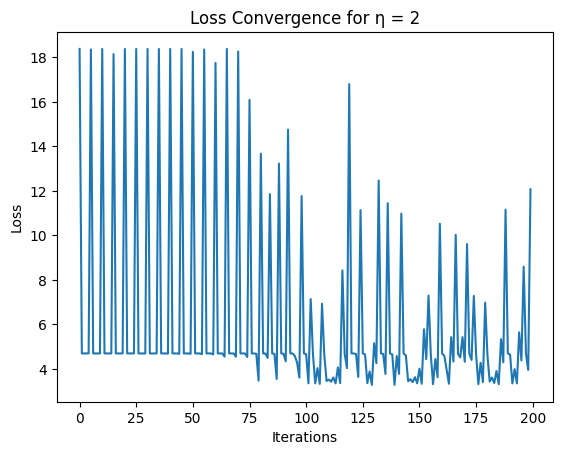

Test Accuracy for η = 2: 88.85%
Confusion Matrix for η = 2:
 [[10979     2]
 [ 1376     0]]

Training model with η = 5


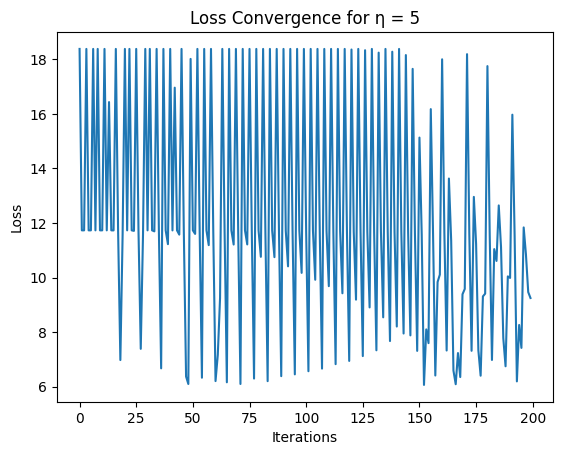

Test Accuracy for η = 5: 19.91%
Confusion Matrix for η = 5:
 [[1392 9589]
 [   3 1373]]

Training model with η = 7


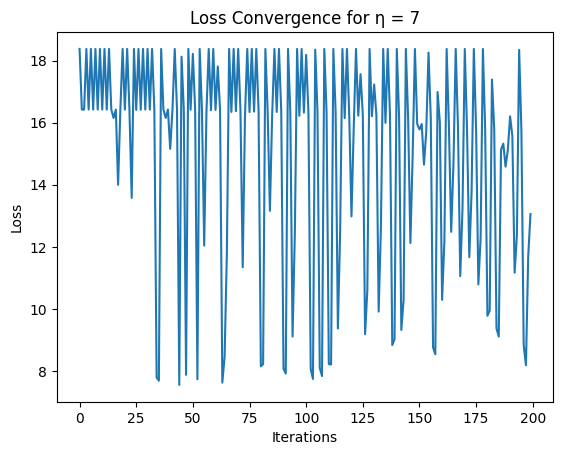

Test Accuracy for η = 7: 11.16%
Confusion Matrix for η = 7:
 [[    4 10977]
 [    0  1376]]

Training model with η = 10


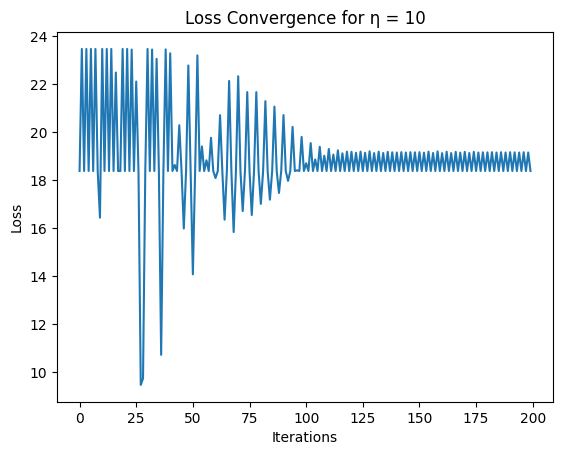

Test Accuracy for η = 10: 86.16%
Confusion Matrix for η = 10:
 [[10844   137]
 [ 1083   293]]


In [63]:
etas = [2, 5, 7, 10]
results = {}

for eta in etas:
    print(f"\nTraining model with η = {eta}")

    # Initialize weights
    np.random.seed(0)
    w = np.random.rand(X_train.shape[1], 1)
    b = 0

    # Train model with weighted loss
    w, b, losses = train_weighted(w, b, X_train, y_train, eta, iterations=200, learning_rate=0.1)

    # Plot loss convergence
    plt.figure()
    plt.plot(losses)
    plt.xlabel("Iterations")
    plt.ylabel("Loss")
    plt.title(f"Loss Convergence for η = {eta}")
    plt.show()

    # Compute predictions
    y_pred_test = predict(model(w, b, X_test))

    # Compute test accuracy
    test_acc = accuracy(y_test, y_pred_test)
    print(f"Test Accuracy for η = {eta}: {test_acc:.2f}%")

    # Compute confusion matrix
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(y_test, y_pred_test)
    print(f"Confusion Matrix for η = {eta}:\n", cm)

    # Store results
    results[eta] = {"test_acc": test_acc, "conf_matrix": cm}


In [65]:
import pandas as pd

# Convert results into a DataFrame
df_results = pd.DataFrame({eta: results[eta]["test_acc"] for eta in etas}, index=["Test Accuracy"]).T
df_results.index.name = "η"

# Display results in Colab
print(df_results)


    Test Accuracy
η                
2       88.852031
5       19.910356
7       11.160550
10      86.159783


In [34]:
from IPython.display import display
display(df_results)


,Test Accuracy
η,
2,88.852031
5,19.910356
7,11.160550
10,86.159783
